In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [18]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [19]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station']]
y = df['Y house price of unit area']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 81.22
R2 Score: 0.4879


In [25]:
model_age = LinearRegression()
model_age.fit(X_train[['X2 house age']], y_train)

model_mrt = LinearRegression()
model_mrt.fit(X_train[['X3 distance to the nearest MRT station']], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


c:\Users\Utente\Desktop\python\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Utente\Desktop\python\Python\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


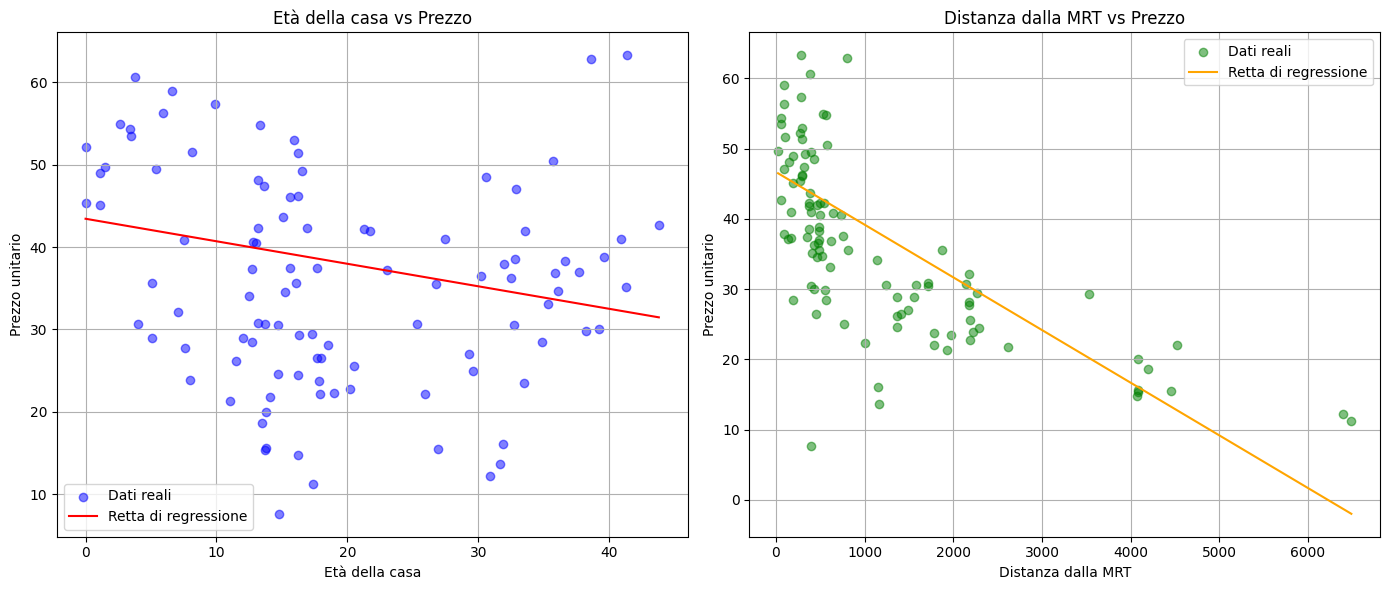

In [26]:
plt.figure(figsize=(14, 6))

# --- House Age ---
plt.subplot(1, 2, 1)

# Dati ordinati per una retta "liscia"
X_age_sorted = np.sort(X_test['X2 house age'].values.reshape(-1, 1), axis=0)
y_pred_age = model_age.predict(X_age_sorted)

# Scatter + Retta
plt.scatter(X_test['X2 house age'], y_test, color='blue', alpha=0.5, label='Dati reali')
plt.plot(X_age_sorted, y_pred_age, color='red', label='Retta di regressione')
plt.xlabel('Età della casa')
plt.ylabel('Prezzo unitario')
plt.title('Età della casa vs Prezzo')
plt.grid(True)
plt.legend()

# --- Distance to MRT ---
plt.subplot(1, 2, 2)

# Dati ordinati per la retta
X_mrt_sorted = np.sort(X_test['X3 distance to the nearest MRT station'].values.reshape(-1, 1), axis=0)
y_pred_mrt = model_mrt.predict(X_mrt_sorted)

# Scatter + Retta
plt.scatter(X_test['X3 distance to the nearest MRT station'], y_test, color='green', alpha=0.5, label='Dati reali')
plt.plot(X_mrt_sorted, y_pred_mrt, color='orange', label='Retta di regressione')
plt.xlabel('Distanza dalla MRT')
plt.ylabel('Prezzo unitario')
plt.title('Distanza dalla MRT vs Prezzo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
